In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
%run ../common/SKL_GPR.py
%run ../common/homemade_BO.py
np.random.seed(seed=123)

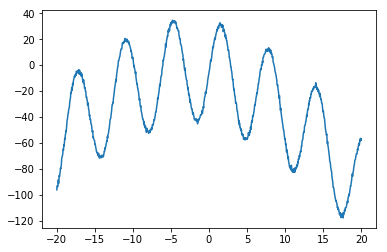

In [2]:
#Define data, supervised data
def target_func(x):
    return 40.0*np.sin(x/1.0) - (0.3*(x+6.0))**2 - (0.2*(x-4.0))**2 - 1.0*np.abs(x+2.0) + np.random.normal(0,1,1)
#
xmin = -20
xmax = 20
Nx = 1000
x = np.linspace(xmin, xmax, Nx)
z = list(map(target_func,x)) #for python3
z = np.array(z)
plt.plot(x, z) #### plot true data
plt.show()
def generate_sample(xval):
    xid = np.argmin((x - xval)**2)
    return z[xid]

In [3]:
#Define GPR and Bayesian opt.
Noptimize = 100
#kernel = kernels.ConstantKernel() + kernels.ConstantKernel()*kernels.RBF()
kernel = kernels.RBF()
#kernel = kernels.ConstantKernel() + kernels.ConstantKernel()*kernels.Matern(nu=0.5)
#kernel = kernels.Matern(nu=0.5)
GPR = GaussianProcessRegressor(kernel=kernel, alpha=1e-8, normalize_y=True, optimizer='fmin_l_bfgs_b', \
                                   copy_X_train=True, n_restarts_optimizer=Noptimize, random_state=123) 
#
BO = Bayesian_opt()
BO.acqui_name = 'EI'
#BO.acqui_name = 'PI'
#BO.acqui_name = 'UCB'
print('# The choice of acquisition function: ',BO.acqui_name)

# The choice of acquisition function:  EI


epoch =  0 , x_point, maxval = -12.781861371329658,  -35.111729295690374
epoch =  1 , x_point, maxval = -20.0,  -35.111729295690374
epoch =  2 , x_point, maxval = -19.95995995995996,  -35.111729295690374
epoch =  3 , x_point, maxval = -18.55855855855856,  -35.111729295690374
epoch =  4 , x_point, maxval = -11.31131131131131,  17.164666750008383
epoch =  5 , x_point, maxval = -9.22922922922923,  17.164666750008383
epoch =  6 , x_point, maxval = 16.676676676676678,  17.164666750008383
epoch =  7 , x_point, maxval = 4.784784784784783,  17.164666750008383
epoch =  8 , x_point, maxval = -1.541541541541541,  17.164666750008383
epoch =  9 , x_point, maxval = -4.824824824824825,  32.56451480896586
epoch =  10 , x_point, maxval = 20.0,  32.56451480896586
epoch =  11 , x_point, maxval = 12.752752752752755,  32.56451480896586
epoch =  12 , x_point, maxval = 1.7417417417417411,  32.56451480896586
epoch =  13 , x_point, maxval = -6.026026026026026,  32.56451480896586
epoch =  14 , x_point, maxval =

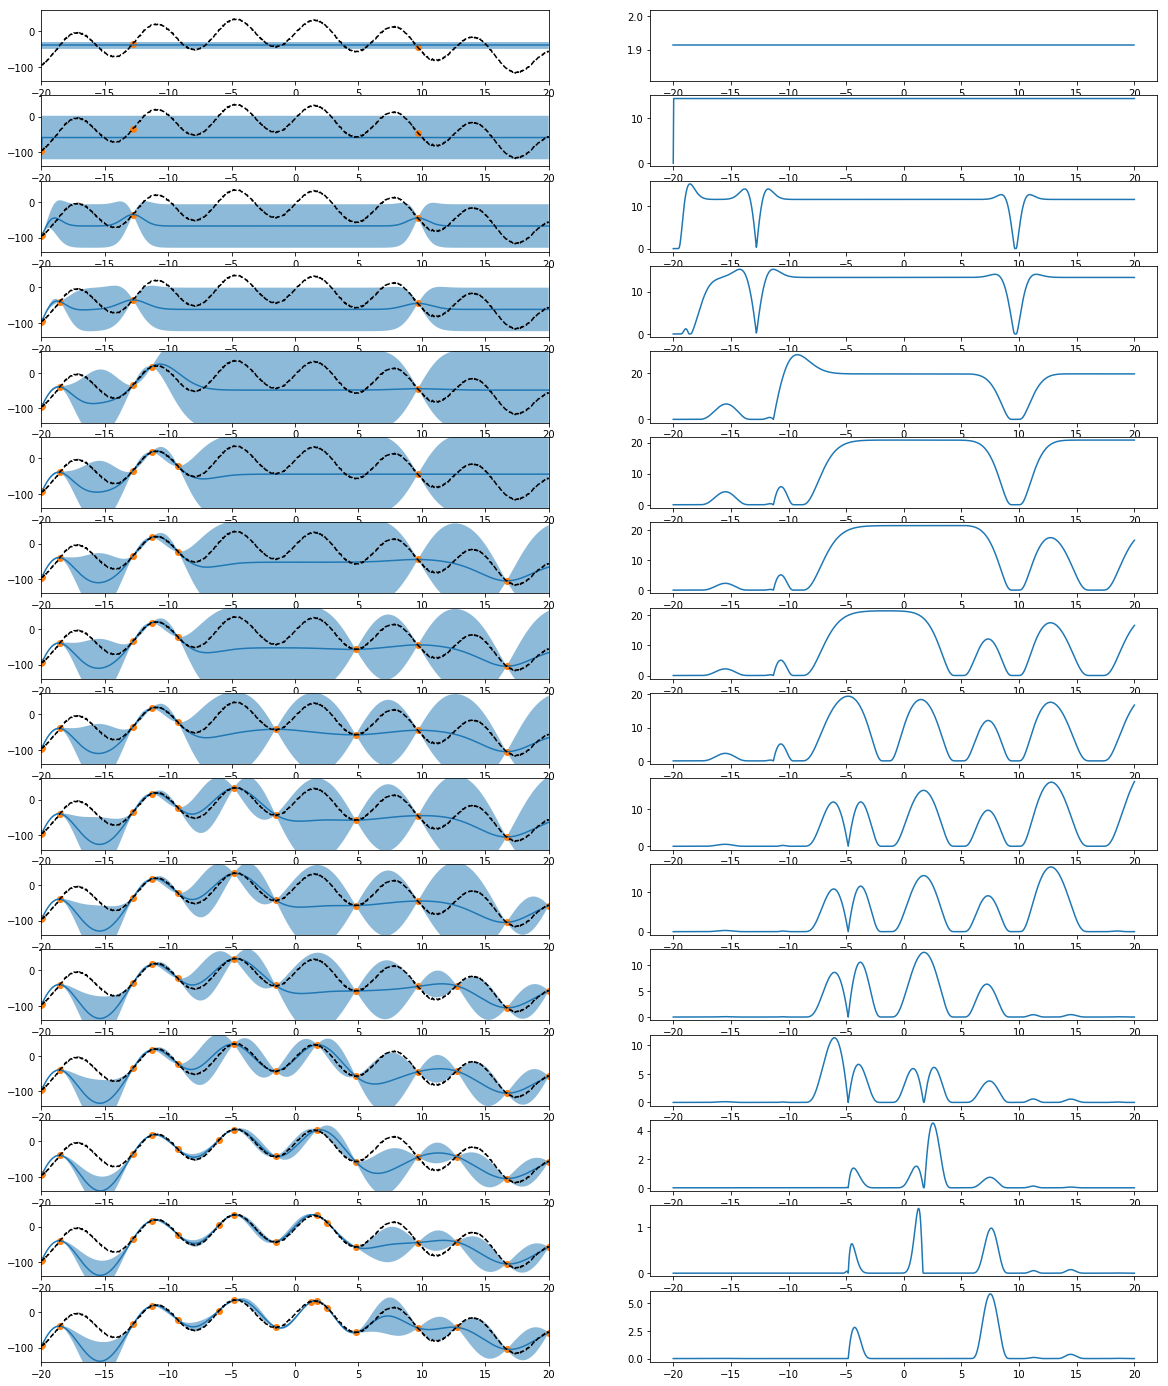

# Actual value of maximum is [34.6804609]
# Got value in the Bayesian_opt is 32.56451480896586
# Optimization is finished.


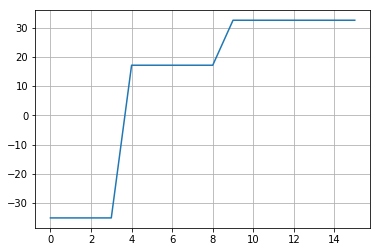

In [4]:
#Definition of array
x_sample = np.array([])
y_sample = np.array([])
x_point = np.random.uniform(-20,20) #Initial point is randomely chosen
x_sample = np.append(x_sample,x_point) 
y_point = generate_sample(x_point) 
y_sample = np.append(y_sample,y_point) 
x_point = np.random.uniform(-20,20) #Second point is randomely chosen as well
#
maxval_list = []
#
epoch = 16 #Number of optimization
Nplotevery = 1
maxval = 'Initial'
plt.figure(figsize=(20, 50))
for i in range(epoch):
    if x_point not in x_sample:
        x_sample = np.append(x_sample,x_point)                          #Add x_point to x_sample
        y_point = generate_sample(x_point)                              #Get y_point value from x_sample
        y_sample = np.append(y_sample,y_point)                          #Add y_point to x_ample
        print ("epoch = ",str(i),", x_point, maxval = "+str(x_point)+',  '+str(max(y_sample)))
    else: 
        print('No new sampling point in this sequence.')
    mean, std = Regression1D(GPR,x_sample,y_sample,x)

    maxval = max(y_sample)                                                     #Update maximum value up to now
    acqui = BO.get_acqui(mean, std, maxval)                                      #Define acquisition function
    x_point = x[np.argmax(acqui)]                                               #Determin the next candidate of the search
    maxval_list.append(maxval)
    if(i%Nplotevery==0):
        plt.subplot(epoch*2,2,i*2+1)
        plt.plot(x,np.array(mean))
        plt.plot(x,z,'k--')
        high_bound = mean+ 1.0*std
        lower_bound = mean- 1.0*std
        plt.fill_between(x,high_bound,lower_bound, alpha=0.5)
        plt.xlim(xmin,xmax)
        plt.ylim(-140,60)
        plt.scatter(x_sample,y_sample)
        plt.subplot(epoch*2,2,i*2+2)
        plt.plot(x,acqui)
        plt.savefig("bayes_"+str(BO.acqui_name)+"_RBF.png")
plt.show()

print("# Actual value of maximum is "+str(max(z)))
print("# Got value in the Bayesian_opt is "+str(maxval))
print("# Optimization is finished.")
plt.figure()
plt.plot(maxval_list)
plt.grid()
plt.show()